<a href="https://colab.research.google.com/github/guidenis93/A-Student-Guide-to-Bayesian-Statistics/blob/main/Problem_set_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12

In [6]:
import numpy as np
import pandas as pd
from math import e
from scipy.integrate import quad
from plotnine import *
import plotnine
import random
plotnine.options.figure_size = (8, 6)

## Problem 12.2 Independent sampling

In [7]:
# Compute integral

def integrand(x):
    value = (1 / (1.33485)) * 1/np.sqrt(2*np.pi) * e**((-x**2)/2)
    return value

I = quad(integrand, 0, 0.9735)
print("Intégrale:", I[0] + (0.186056*(5-0.9735)))
    
# Mean with rejection sampling

N = 20000
x_list = []

for i in range(N):
    x = np.random.uniform(0,5)
    y = np.random.uniform(0, (1 / 1.335) * (1 / np.sqrt(2 * np.pi)))
    if x < 0.9735:
        f = integrand(x)
    else:
        f = 0.1860056
    
    if y < f:
        x_list.append(x)
        
print("Mean:", np.mean(np.array(x_list)))
print("Variance:", np.var(np.array(x_list)))

Intégrale: 1.0000048191644215
Mean: 2.3528136544118907
Variance: 2.2255582254805435


## Problem 12.4 Markovian Coin

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


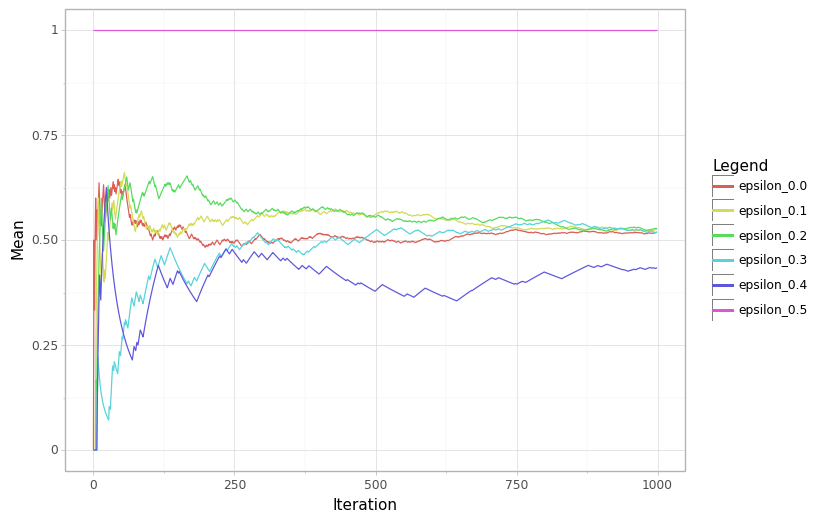

<ggplot: (8748021692309)>

In [8]:
N = 1000
epsilon = 0.50
sim_dic = {}

for eps in np.linspace(0, epsilon, 6):
    coin_list = []
    last_toss = 0
    
    for i in range(N):
        if i==0:
            toss = np.random.uniform(0, 1)
            if toss > 0.5:
                coin_list.append(1)
                last_toss = 1
            if toss < 0.5:
                coin_list.append(0)
                last_toss = 0
                
            actual_mean = np.mean(np.array(coin_list))
            sim_dic["epsilon_" + str(np.round(eps,2))] = [actual_mean]
        
        else:
            toss = np.random.uniform(0,1)

            if last_toss == 0:
                if toss > 0.5 + eps:
                    coin_list.append(1)
                    last_toss = 1
                if toss < 0.5 + eps:
                    coin_list.append(0)
                    last_toss = 0

            else:
                if toss > 0.5 - eps:
                    coin_list.append(1)
                    last_toss = 1
                if toss < 0.5 - eps:
                    coin_list.append(0)
                    last_toss = 0
            
            actual_mean = np.mean(np.array(coin_list))
            sim_dic["epsilon_" + str(np.round(eps,2))].append(actual_mean)
                    

# Change to dataframe format
data = pd.DataFrame.from_dict(sim_dic)
data.reset_index(inplace = True)

# Plot data
import plotnine
plotnine.options.figure_size = (8, 6)

(ggplot(pd.melt(data, id_vars = "index"), aes(x = "index", y = "value", color = "factor(variable)")) +
 geom_line() +
 labs(x = "Iteration", y = "Mean", color = "Legend") + 
 theme_light()
)

# Problem 12.5 Markovian die

In [21]:
N = 100
num_eps = 10
face_dic = {}

for eps in np.linspace(0, 1, num_eps + 1):
  face_list = []
  
  for i in range(N):
    possible_faces = [1,2,3,4,5,6]
    weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

    if i == 0:
      face = random.choice(possible_faces)
      face_list.append(face)

    else:
      if face >= 2 and face <= 5:
        face_n1 = face - 1
        face_n2 = face + 1

      elif face == 1:
        face_n1 = 6
        face_n2 = 2
        
      elif face == 6:
        face_n1 = 5
        face_n2 = 1

      for index, weight in enumerate(weights):
        if (index + 1) == face_n1 or (index + 1) == face_n2:
          weights[index] = (1/6 * (1-eps)) + eps/2

        else:
          weights[index] = (1/6 * (1-eps))

      face = random.choices(population = possible_faces, weights = weights, k = 1)[0]
      face_list.append(face)

    face_dic["epsilon_" + str(eps)] = face_list
      

In [25]:
face_dic["epsilon_1.0"]

[6,
 5,
 4,
 5,
 6,
 1,
 6,
 5,
 6,
 5,
 4,
 5,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 5,
 4,
 3,
 2,
 3,
 4,
 5,
 4,
 5,
 4,
 3,
 4,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 6,
 1,
 2,
 1,
 6,
 5,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 6,
 1,
 2,
 3,
 4,
 3,
 4,
 5,
 6,
 5,
 4,
 3,
 2,
 1,
 2,
 1,
 6,
 5,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 5,
 4,
 5]